# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [1]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [2]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [3]:
import numpy as np

In [4]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [12]:
iris_dataset_1 = np.delete(iris_dataset.data, 1, axis=1)
iris_dataset_2 = np.delete(iris_dataset.data, 0, axis=1)

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [22]:
# если работаете в интерактивной оболочке IPython 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

**Пример** построения трехмерного графика

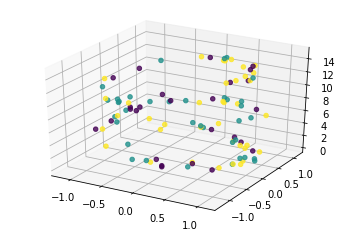

In [28]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

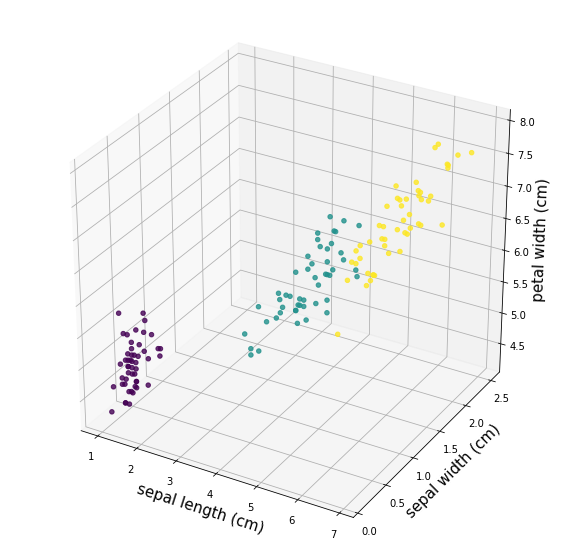

In [40]:
plt.figure(figsize=(10, 10)) 
ax = plt.axes(projection='3d')

zdata = iris_dataset_1[:,0] # точки оси Z
xdata = iris_dataset_1[:,1] # точки оси X
ydata = iris_dataset_1[:,2] # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=iris_dataset.target)
plt.xlabel('sepal length (cm)', fontsize=15)
plt.ylabel('sepal width (cm)', fontsize=15)
ax.set_zlabel('petal width (cm)', fontsize=15)

plt.grid()
plt.show()

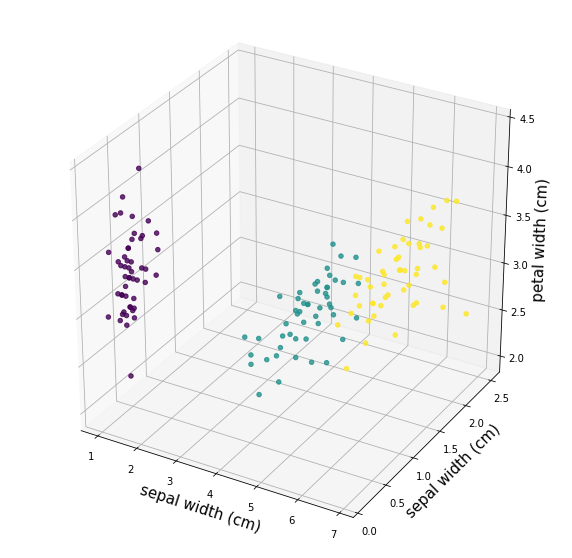

In [41]:
plt.figure(figsize=(10, 10)) 
ax = plt.axes(projection='3d')

zdata = iris_dataset_2[:,0] # точки оси Z
xdata = iris_dataset_2[:,1] # точки оси X
ydata = iris_dataset_2[:,2] # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=iris_dataset.target)
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('sepal width (cm)', fontsize=15)
ax.set_zlabel('petal width (cm)', fontsize=15)

plt.grid()
plt.show()

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [49]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, 
                                                    iris_dataset['target'],
                                                    random_state=17) 

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, 
                                                    iris_dataset['target'],
                                                    random_state=17) 


In [50]:
knn = KNeighborsClassifier(n_neighbors=5)

knn_model_1 = knn.fit(x_train_1, y_train_1)
knn_predictions_1 = knn.predict(x_test_1)

knn_model_2 = knn.fit(x_train_2, y_train_2)
knn_predictions_2 = knn.predict(x_test_2)

### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_1 = accuracy_score(y_test_1, knn_predictions_1)
accuracy_2 = accuracy_score(y_test_2, knn_predictions_2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9736842105263158, accuracy_2: 0.9736842105263158


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [1]:
### YOUR CODE HERE ###

In [80]:
accuracy_1_=[]
accuracy_2_=[]

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn_model_1 = knn.fit(x_train_1, y_train_1)
    knn_predictions_1 = knn.predict(x_test_1)
    accuracy_1 = accuracy_score(y_test_1, knn_predictions_1)
    accuracy_1_.append(accuracy_1)

    knn_model_2 = knn.fit(x_train_2, y_train_2)
    knn_predictions_2 = knn.predict(x_test_2)
    accuracy_2 = accuracy_score(y_test_2, knn_predictions_2)
    accuracy_2_.append(accuracy_2)

In [81]:
np.arange(1,21)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

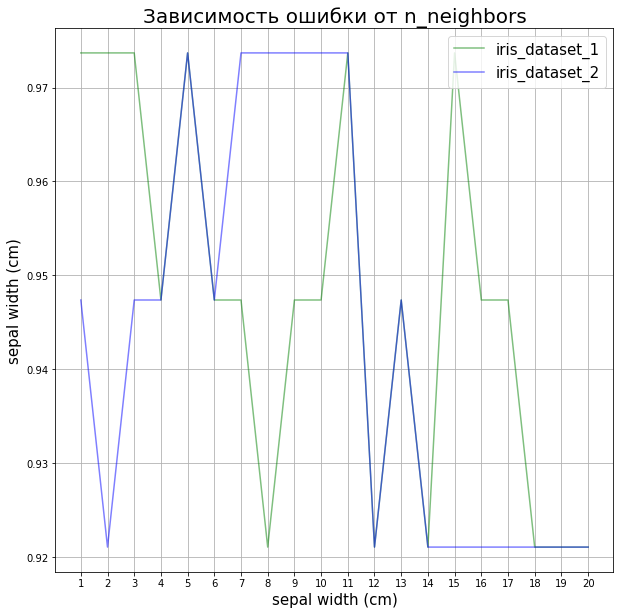

In [82]:
plt.figure(figsize=(10, 10)) 
plt.plot(np.arange(1,21), accuracy_1_, c='g', alpha = 0.5, label ='iris_dataset_1')
plt.plot(np.arange(1,21), accuracy_2_, c='b', alpha = 0.5, label ='iris_dataset_2')
plt.xticks(np.arange(1,21))
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('sepal width (cm)', fontsize=15)
plt.title('Зависимость ошибки от n_neighbors', fontsize=20)
plt.legend(prop={'size': 15})
plt.grid()
plt.show()

In [78]:
accuracy_1_[11]

0.9210526315789473

In [128]:
a = (accuracy_1_ == min(accuracy_1_)) & (accuracy_2_ == min(accuracy_2_))
a

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
        True,  True])

In [130]:
aa = np.where(a == True)[0] + 1

array([12, 14, 18, 19, 20], dtype=int64)

In [133]:
print (aa, ' - значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score()')

[12 14 18 19 20]  - значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score()
